In [4]:
Retail=pd.read_csv('C:\\documents\\study material\\data science\\supply chain\\Udemy - RA Data Science and Supply Chain analytics. A-Z with Python 2020-9\\10. Forecasting Basics\\14.2 retail_clean.csv',parse_dates=True)

Retail.head()

<IPython.core.display.Javascript object>

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [5]:
Retail.describe()

,Unnamed: 0,Invoice,Quantity,Price,Customer ID,Revenue
count,7.794950e+05,779495.000000,779495.000000,779495.000000,779495.000000,779495.000000
mean,5.315660e+05,537427.005391,13.507085,3.218199,15320.262918,22.289821
std,3.110433e+05,26901.961110,146.540284,29.674823,1695.722988,227.416962
min,0.000000e+00,489434.000000,1.000000,0.000000,12346.000000,0.000000
25%,2.598405e+05,514483.000000,2.000000,1.250000,13971.000000,4.950000
50%,5.071680e+05,536754.000000,6.000000,1.950000,15246.000000,12.480000
75%,8.114895e+05,562002.000000,12.000000,3.750000,16794.000000,19.800000
max,1.067370e+06,581587.000000,80995.000000,10953.500000,18287.000000,168469.600000


In [6]:
Retail['InvoiceDate']=pd.to_datetime(Retail['InvoiceDate'])

<IPython.core.display.Javascript object>

In [7]:
Retail['date']=Retail['InvoiceDate'].dt.strftime('%Y-%m-%d')

In [8]:
Retail['date']=pd.to_datetime(Retail['date'])

<IPython.core.display.Javascript object>

In [9]:
Retail[Retail['Description']=='PINK CHERRY LIGHTS']

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,date
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12-01
187,209,489460,79323P,PINK CHERRY LIGHTS,8,2009-12-01 10:46:00,6.75,16167.0,United Kingdom,54.00,2009-12-01
864,939,489539,79323P,PINK CHERRY LIGHTS,24,2009-12-01 12:18:00,5.45,15061.0,United Kingdom,130.80,2009-12-01
2072,3128,489656,79323P,PINK CHERRY LIGHTS,48,2009-12-01 17:28:00,5.45,17428.0,United Kingdom,261.60,2009-12-01
2099,3155,489658,79323P,PINK CHERRY LIGHTS,6,2009-12-01 17:31:00,6.75,15485.0,United Kingdom,40.50,2009-12-01
...,...,...,...,...,...,...,...,...,...,...,...
120104,165064,505002,79323P,PINK CHERRY LIGHTS,3,2010-04-19 12:39:00,6.75,16905.0,United Kingdom,20.25,2010-04-19
120637,165794,505056,79323P,PINK CHERRY LIGHTS,3,2010-04-19 14:59:00,6.75,14667.0,United Kingdom,20.25,2010-04-19
121497,166688,505177,79323P,PINK CHERRY LIGHTS,2,2010-04-20 13:43:00,6.75,13042.0,United Kingdom,13.50,2010-04-20
258601,340902,522631,79323P,PINK CHERRY LIGHTS,24,2010-09-16 09:07:00,5.45,14156.0,EIRE,130.80,2010-09-16


In [10]:
des_max=Retail.groupby('Description').agg(max_price=('Price',np.max)).reset_index()

<IPython.core.display.Javascript object>

In [11]:
Retail=pd.merge(Retail,des_max,how='left')
Retail.head()

<IPython.core.display.Javascript object>

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,date,max_price
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01,7.95
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,6.75
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,6.75
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01,4.96
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01,2.46


In [12]:
Retail['cost']=Retail['max_price']*0.4
Retail['profit']=Retail['Price']-Retail['cost']
Retail.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,date,max_price,cost,profit
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01,7.95,3.180,3.770
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,6.75,2.700,4.050
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,6.75,2.700,4.050
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01,4.96,1.984,0.116
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01,2.46,0.984,0.266


In [13]:
grouped_retial=Retail.groupby(['Description','date']).agg(total_quantity=('Quantity',np.sum),total_profit=('profit',np.sum),total_Price=('Price',np.sum),total_cost=('cost',np.sum),total_Revenue=('Revenue',np.sum))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
grouped_retial.head()

total_quantity  total_profit  \
Description                         date                                       
  DOORMAT UNION JACK GUNS AND ROSES 2010-01-05               1          4.05   
                                    2010-01-08              12         11.35   
                                    2010-01-10               3          4.05   
                                    2010-01-11              15          7.30   
                                    2010-01-12               1          4.05   

                                                total_Price  total_cost  \
Description                         date                                  
  DOORMAT UNION JACK GUNS AND ROSES 2010-01-05         6.75         2.7   
                                    2010-01-08        19.45         8.1   
                                    2010-01-10         6.75         2.7   
                                    2010-01-11        12.70         5.4   
                                    2010-01-12         6.75         2.7   

                                                total_Revenue  
Description                         date                       
  DOORMAT UNION JACK GUNS AND ROSES 2010-01-05           6.75  
                                    2010-01-08          73.00  
                                    2010-01-10          20.25  
                                    2010-01-11          93.25  
                                    2010-01-12           6.75

In [29]:
Des_grouped_retial=Retail.groupby(['Description']).agg(total_quantity=('Quantity',np.sum),total_profit=('profit',np.sum),total_Price=('Price',np.sum),total_cost=('cost',np.sum),total_Revenue=('Revenue',np.sum))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
# R,F,M Analysis

In [15]:
max_date=max(Retail['date'])

In [17]:
#  R - Recency
# how recent customer purchased in days

In [26]:
customer_recency=Retail.groupby(['Customer ID']).agg(last_date=('date',max)).reset_index()
customer_recency['recency']=max_date-customer_recency['last_date']
customer_recency['recency']=customer_recency['recency'].astype('string').str.replace('days','').astype(int)

In [27]:
customer_recency.head()

,Customer ID,last_date,recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


In [28]:
## F - Frequency
# how frequent customers visists or purchases

In [31]:
freq1=Retail.groupby(['Customer ID','Invoice']).agg(count=('Description','count')).reset_index()

In [47]:
freq2=freq1.groupby('Customer ID').agg(freq=('count','count')).reset_index()
freq2.head()

,Customer ID,freq
0,12346.0,12
1,12347.0,8
2,12348.0,5
3,12349.0,4
4,12350.0,1


In [34]:
# M - Monetary value 
# how much customers spends money

In [36]:
monet1=Retail.groupby(['Customer ID','Invoice']).agg(Revenue=('Revenue','sum')).reset_index()
monet2=monet1.groupby(['Customer ID']).agg(monetary=('Revenue','mean')).reset_index()

In [37]:
monet2.head()

,Customer ID,monetary
0,12346.0,6463.038333
1,12347.0,615.191250
2,12348.0,403.880000
3,12349.0,1107.172500
4,12350.0,334.400000


In [48]:
customer_recency['Recency_Rank']=customer_recency['recency'].rank(pct=True)

In [51]:
freq2['freq_rank']=freq2['freq'].rank(ascending=False,pct=True)

In [ ]:
monet2['monet_rank']=monet2['monetary'].rank(ascending=False,pct=True)

In [52]:
ALL_DATA=pd.merge(customer_recency,freq2,how='left')

<IPython.core.display.Javascript object>

In [53]:
ALL_DATA=pd.merge(ALL_DATA,monet2,how='left')

<IPython.core.display.Javascript object>

In [54]:
ALL_DATA.head()

,Customer ID,last_date,recency,Recency_Rank,freq,freq_rank,monetary,monet_rank
0,12346.0,2011-01-18,325,0.710338,12,0.118602,6463.038333,0.001530
1,12347.0,2011-12-07,2,0.031202,8,0.206427,615.191250,0.106104
2,12348.0,2011-09-25,75,0.458085,5,0.336932,403.880000,0.263051
3,12349.0,2011-11-21,18,0.192229,4,0.408859,1107.172500,0.028567
4,12350.0,2011-02-02,310,0.699286,1,0.861843,334.400000,0.375446


In [85]:
bins=[0,0.5,1]
name=['1','2']

In [86]:
final=pd.DataFrame(ALL_DATA['Customer ID'])
final.head()

<IPython.core.display.Javascript object>

,Customer ID
0,12346.0
1,12347.0
2,12348.0
3,12349.0
4,12350.0


In [87]:
final['recency']=pd.cut(customer_recency['Recency_Rank'],bins,labels=name).astype('string')

<IPython.core.display.Javascript object>

In [88]:
final['freq']=pd.cut(freq2['freq_rank'],bins,labels=name).astype('string')

<IPython.core.display.Javascript object>

In [89]:
final['monet']=pd.cut(monet2['monet_rank'],bins,labels=name).astype('string')

<IPython.core.display.Javascript object>

In [101]:
final['rec_freq_monet']=final['recency']+final['freq']+final['monet']

In [103]:
final=final.sort_values('rec_freq_monet')

<IPython.core.display.Javascript object>

C:\Users\njjanaki\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rec_freq_monet', ylabel='count'>

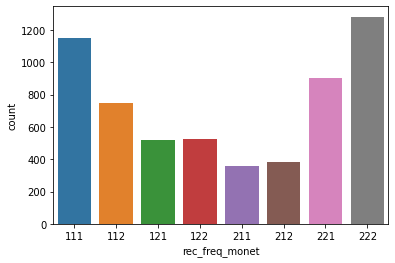

In [104]:
sns.countplot('rec_freq_monet',data=final)

In [1]:
# from sklearn.linear_model import linear_model

In [37]:
!pip install -U scikit-learn